## Plotting gmaps

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import os
import requests
import json
from pprint import pprint
from dotenv import load_dotenv
import gmaps
import seaborn as sns
sns.set()

In [2]:
# API Call
load_dotenv()
API_KEY = os.getenv("Yelp_API") # put your key here if you don't have a .env file in your main project folder.
headers = {'Authorization': 'Bearer %s' % API_KEY}
base_url = "https://api.yelp.com/v3/businesses/search"
g_key = os.getenv("g_key") # put your key here if you don't have a .env file in your main project folder.

In [3]:
#get data for gmaps
stadium_data_df = pd.read_csv('Resources/stadium_coordinates_capacity.csv', dtype={
    "NFL Team": "string",
    "City": "string",
    "State": "string",
    "Stadium Name": "string",
    "Latitude": np.float64,
    "Longitude": np.float64,
    "Zip Code": "string"
})
stadium_data_df = stadium_data_df.dropna()
stadium_data_df.head()

,NFL Team,City,State,Stadium Name,Capacity,Latitude,Longitude,Zip Code
0,Arizona Cardinals,Glendale,Arizona,State Farm Stadium,63400,33.528000,-112.263000,85305
1,Atlanta Falcons,Atlanta,Georgia,Mercedes-Benz Stadium,71000,33.755556,-84.400000,30313
2,Baltimore Ravens,Baltimore,Maryland,M&T Bank Stadium,71008,39.278056,-76.622778,21230
3,Buffalo Bills,Orchard Park,New York,Bills Stadium,71608,42.774000,-78.787000,14127
4,Carolina Panthers,Charlotte,North Carolina,Bank of America Stadium,73778,35.225833,-80.852778,28202


In [4]:
#get data for gmaps
saturday1000_df = pd.read_csv('Resources/saturday1000_ouput.csv')
saturday1000_df.head()

,NFL Team,City,State,Stadium Name,Latitude,Longitude,Zip Code,Average Ratings (1-5),Average Number of Reviews,Average Price (1-4),Number of businesses
0,Arizona Cardinals,Glendale,Arizona,State Farm Stadium,33.528000,-112.263000,85305,3.000000,162.315789,1.473684,94
1,Atlanta Falcons,Atlanta,Georgia,Mercedes-Benz Stadium,33.755556,-84.400000,30313,3.404537,248.502836,1.623819,705
2,Baltimore Ravens,Baltimore,Maryland,M&T Bank Stadium,39.278056,-76.622778,21230,3.538784,160.968553,1.706499,668
3,Buffalo Bills,Orchard Park,New York,Bills Stadium,42.774000,-78.787000,14127,3.166667,50.030303,1.696970,51
4,Carolina Panthers,Charlotte,North Carolina,Bank of America Stadium,35.225833,-80.852778,28202,3.635569,190.620991,1.670554,441


In [5]:
#combine df
saturday1000_df['Capacity'] = pd.Series(stadium_data_df['Capacity'])
saturday1000_df.head()

,NFL Team,City,State,Stadium Name,Latitude,Longitude,Zip Code,Average Ratings (1-5),Average Number of Reviews,Average Price (1-4),Number of businesses,Capacity
0,Arizona Cardinals,Glendale,Arizona,State Farm Stadium,33.528000,-112.263000,85305,3.000000,162.315789,1.473684,94,63400
1,Atlanta Falcons,Atlanta,Georgia,Mercedes-Benz Stadium,33.755556,-84.400000,30313,3.404537,248.502836,1.623819,705,71000
2,Baltimore Ravens,Baltimore,Maryland,M&T Bank Stadium,39.278056,-76.622778,21230,3.538784,160.968553,1.706499,668,71008
3,Buffalo Bills,Orchard Park,New York,Bills Stadium,42.774000,-78.787000,14127,3.166667,50.030303,1.696970,51,71608
4,Carolina Panthers,Charlotte,North Carolina,Bank of America Stadium,35.225833,-80.852778,28202,3.635569,190.620991,1.670554,441,73778


In [6]:
#clean data for gmaps
#dropped duplicate data - MetLife(NY) & SoFi(LA) Stadium
gmaps_df = saturday1000_df.drop_duplicates(subset='Stadium Name', keep='first')

#find number of restaurants per attendee
attendees_per_rest = []
attendees_per_rest = round(gmaps_df['Capacity'] / gmaps_df['Number of businesses'])

#find max value of rest_per_attendee
max_attendees_per_rest = max(attendees_per_rest)

gmaps_df['Attendees per Restaurant'] = attendees_per_rest
gmaps_df

C:\Users\decobuilding\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,NFL Team,City,State,Stadium Name,Latitude,Longitude,Zip Code,Average Ratings (1-5),Average Number of Reviews,Average Price (1-4),Number of businesses,Capacity,Attendees per Restaurant
0,Arizona Cardinals,Glendale,Arizona,State Farm Stadium,33.528000,-112.263000,85305,3.000000,162.315789,1.473684,94,63400,674.0
1,Atlanta Falcons,Atlanta,Georgia,Mercedes-Benz Stadium,33.755556,-84.400000,30313,3.404537,248.502836,1.623819,705,71000,101.0
2,Baltimore Ravens,Baltimore,Maryland,M&T Bank Stadium,39.278056,-76.622778,21230,3.538784,160.968553,1.706499,668,71008,106.0
3,Buffalo Bills,Orchard Park,New York,Bills Stadium,42.774000,-78.787000,14127,3.166667,50.030303,1.696970,51,71608,1404.0
4,Carolina Panthers,Charlotte,North Carolina,Bank of America Stadium,35.225833,-80.852778,28202,3.635569,190.620991,1.670554,441,73778,167.0
5,Chicago Bears,Chicago,Illinois,Soldier Field,41.862300,-87.616700,60605,3.719512,416.009978,1.848115,1400,61500,44.0
6,Cincinnati Bengals,Cincinatti,Ohio,Paul Brown Stadium,39.095000,-84.516000,45202,3.732044,148.392265,1.577348,458,65535,143.0
7,Cleveland Browns,Cleveland,Ohio,FirstEnergy Stadium,41.506111,-81.699444,44114,3.706693,157.090551,1.736220,354,67895,192.0
8,Dallas Cowboys,Arlington,Texas,AT&T Stadium,32.747778,-97.092778,76011,3.222892,123.843373,1.409639,210,80000,381.0
9,Denver Broncos,Denver,Colorado,Empower Field at Mile High,39.741000,-105.019700,80204,3.766292,275.865169,1.701124,575,76125,132.0


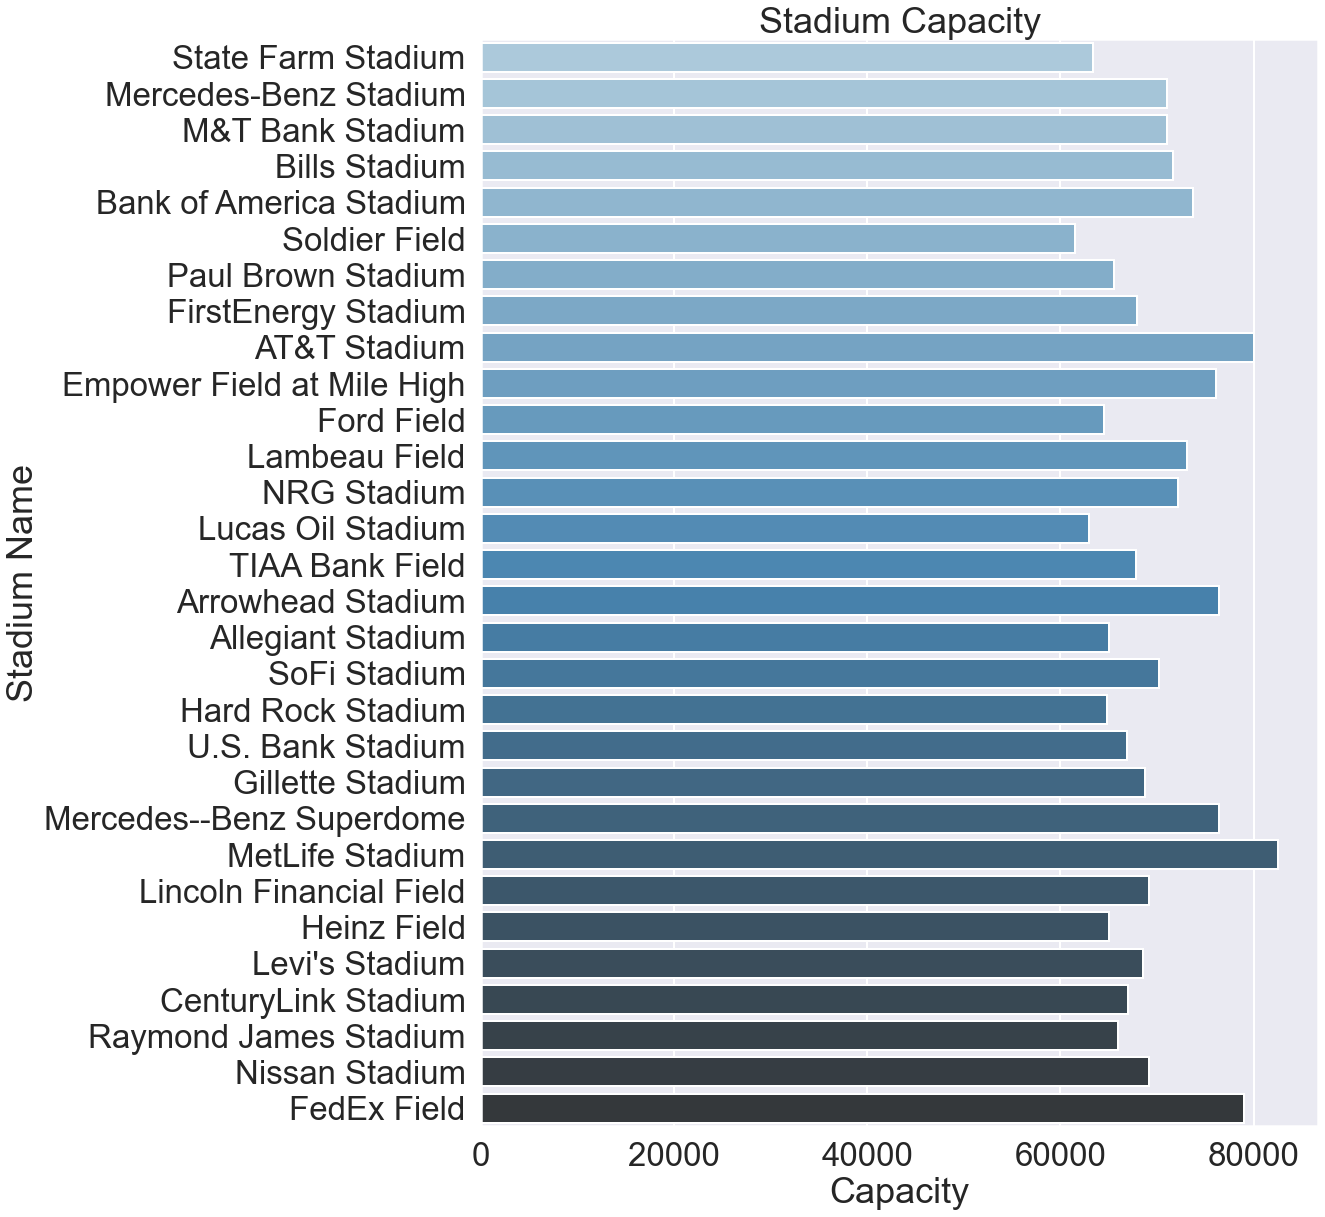

In [11]:
#show stadium capacity
#Set context, increase font size
sns.set_context("poster", font_scale=1.5)
#Create a figure
plt.figure(figsize=(15,20))
#Define the axis object
ax = sns.barplot(x='Capacity', y='Stadium Name', data=gmaps_df, palette="Blues_d")
#set paramters
ax.set(xlabel='Capacity', ylabel='Stadium Name', title= "Stadium Capacity")
#show the plot
plt.savefig(f'justin-images/stadium_capacity', bbox_inches = 'tight')

In [12]:
#configure gmaps
gmaps.configure(g_key)

#template for the markers on gmap
info_box_template = """
<dl>
<dt>Team</dt><dd>{NFL Team}</dd>
<dt>City</dt><dd>{City}, {State}</dd>
<dt>Stadium</dt><dd>{Stadium Name}</dd>
<dt>Restaurants</dt><dd>{Number of businesses}</dd>
</dl>
"""
stadium_info = [info_box_template.format(**row) for index, row in gmaps_df.iterrows()]
locations = gmaps_df[["Latitude", "Longitude"]]

In [13]:
#looking for options?
#gmap for number of restaurants in a 2 mile radius around each stadium
#plot gmaps
fig = gmaps.figure()

#create heat layer (number of businesses)
heat_layer = gmaps.heatmap_layer(locations, weights=gmaps_df['Number of businesses'], 
                                 dissipating=False, max_intensity=1400,
                                 point_radius=3)

#add layer
fig.add_layer(heat_layer)

#add markers
markers = gmaps.symbol_layer(locations, info_box_content=stadium_info, fill_color='blue', stroke_color='blue', scale=2)
fig.add_layer(markers)

fig

Figure(layout=FigureLayout(height='420px'))

In [14]:
#gmap based on number of attendees per restaurant 
#plot gmaps
fig2 = gmaps.figure()

#create heat layer (Average Ratings (1-5))
heat_layer2 = gmaps.heatmap_layer(locations, weights=gmaps_df['Attendees per Restaurant'], 
                                 dissipating=False, max_intensity=max_attendees_per_rest,
                                 point_radius=2)

#add layer
fig2.add_layer(heat_layer2)

#add markers
markers2 = gmaps.symbol_layer(locations, info_box_content=stadium_info, fill_color='blue', stroke_color='blue', scale=2)
fig2.add_layer(markers2)

fig2

Figure(layout=FigureLayout(height='420px'))

In [15]:
#gmap based on average ratings
#plot gmaps
fig3 = gmaps.figure()

#create heat layer (Average Ratings (1-5))
heat_layer3 = gmaps.heatmap_layer(locations, weights=gmaps_df['Average Ratings (1-5)'], 
                                 dissipating=False, max_intensity=5,
                                 point_radius=1)

#add layer
fig3.add_layer(heat_layer3)

#add markers
markers3 = gmaps.symbol_layer(locations, info_box_content=stadium_info, fill_color='blue', stroke_color='blue', scale=2)
fig3.add_layer(markers3)

fig3

Figure(layout=FigureLayout(height='420px'))

### According to statistica.com, there are 660,755 restaurants in the US as of spring 2018.
### Roughly 2% of all resturants in the US exist within a 2 mile radius of NFL stadiums.

In [23]:
#according to statistica.com, there are 660,755 restaurants in the US as of spring 2018
#find total number of resturants within a 2 mile radius of all NFL stadiums
gmaps_df['Number of businesses'].sum()

12519

In [24]:
#roughly 2% of all resturants in the US exist within a 2 mile radius of NFL stadiums
round(12519/660755, 2)

0.02